In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [148]:
price_earning = pd.read_csv("./data/sample_earnings1.csv")

price_earning.head()

,Unnamed: 0,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%),date,formatted_date,Reported EPS_sum,Reported EPS_diff,month,open_mean,close_mean
0,0,GOOGL,Alphabet Inc.,"Oct 26, 2021, 4 PMEDT",1.17,1.40,19.21,2021-10-26,26/10/2021T12:00 AM,5.19,0.20,2021-11,147.242546,146.756643
1,1,GOOGL,Alphabet Inc.,"Jul 27, 2021, 4 PMEDT",0.97,1.36,40.94,2021-07-27,27/07/2021T12:00 AM,4.61,0.18,2021-08,138.017340,138.371114
2,2,GOOGL,Alphabet Inc.,"Apr 27, 2021, 4 PMEDT",0.79,1.31,66.18,2021-04-27,27/04/2021T12:00 AM,3.76,-0.01,2021-05,115.447525,115.427900
3,3,GOOGL,Alphabet Inc.,"Feb 02, 2021, 4 PMEST",0.80,1.12,40.25,2021-02-02,02/02/2021T12:00 AM,2.94,0.24,2021-03,102.473305,102.383718
4,4,GOOGL,Alphabet Inc.,"Oct 29, 2020, 4 PMEDT",0.56,0.82,45.27,2020-10-29,29/10/2020T12:00 AM,2.59,0.15,2020-11,87.013525,87.169500


In [149]:
price_earning.sort_values(by="month",
                          ascending=True,
                          inplace=True)
price_earning.reset_index(drop=True, inplace=True)
price_earning.head()

,Unnamed: 0,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%),date,formatted_date,Reported EPS_sum,Reported EPS_diff,month,open_mean,close_mean
0,19,GOOGL,Alphabet Inc.,"Jan 26, 2017, 4 PMEST",0.48,0.47,-2.95,2017-01-26,26/01/2017T12:00 AM,1.72,0.05,2017-02,41.807553,41.837737
1,18,GOOGL,Alphabet Inc.,"Apr 27, 2017, 4 PMEDT",0.37,0.39,4.59,2017-04-27,27/04/2017T12:00 AM,1.73,-0.11,2017-05,47.979796,48.082727
2,17,GOOGL,Alphabet Inc.,"Jul 24, 2017, 4 PMEDT",0.22,0.25,11.67,2017-07-24,24/07/2017T12:00 AM,1.56,-0.15,2017-08,46.904196,46.898044
3,16,GOOGL,Alphabet Inc.,"Oct 26, 2017, 4 PMEDT",0.42,0.48,14.91,2017-10-26,26/10/2017T12:00 AM,1.59,0.20,2017-11,52.314453,52.349167
4,15,GOOGL,Alphabet Inc.,"Feb 01, 2018, 4 PMEST",0.50,0.49,-2.80,2018-02-01,01/02/2018T12:00 AM,1.61,0.08,2018-03,54.887143,54.688452


In [150]:
price_earning = price_earning[["month", "Reported EPS_sum", "Reported EPS_diff", "close_mean"]]
price_earning.head()

,month,Reported EPS_sum,Reported EPS_diff,close_mean
0,2017-02,1.72,0.05,41.837737
1,2017-05,1.73,-0.11,48.082727
2,2017-08,1.56,-0.15,46.898044
3,2017-11,1.59,0.20,52.349167
4,2018-03,1.61,0.08,54.688452


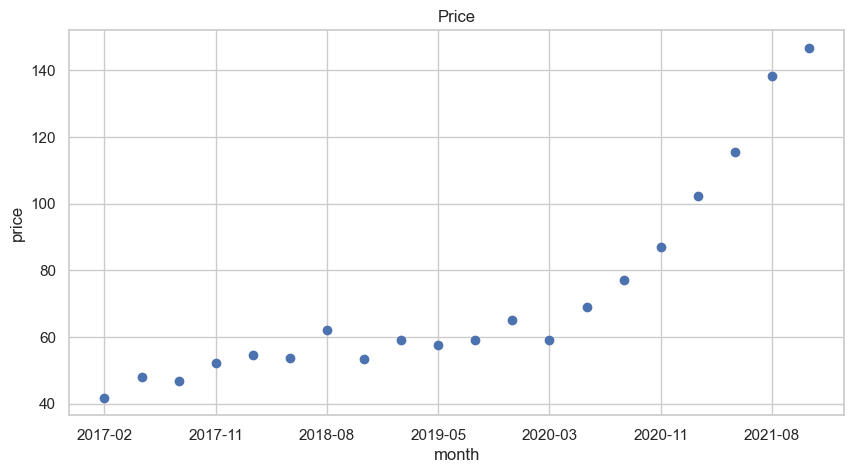

In [151]:
fig = plt.figure(figsize=(10,5)) #그래프를 그리기 위한 캔버스 역할
ax = plt.axes() #하나의 도표에 해당하는 역할 담당
ax.scatter(price_earning["month"], price_earning["close_mean"]) #산점도 그리기 x,y값
ax.set(xlabel='month', ylabel='price', title='Price') #
ax.set_xticks(price_earning["month"][np.arange(0,len(price_earning), step=3)]) #x축 0,6,9 해당하는 인덱스 순서대로 보여줌

In [152]:
price_earning[:10]

,month,Reported EPS_sum,Reported EPS_diff,close_mean
0,2017-02,1.72,0.05,41.837737
1,2017-05,1.73,-0.11,48.082727
2,2017-08,1.56,-0.15,46.898044
3,2017-11,1.59,0.20,52.349167
4,2018-03,1.61,0.08,54.688452
5,2018-05,1.72,-0.04,53.742636
6,2018-08,2.06,0.02,62.032696
7,2018-11,2.23,0.04,53.308405
8,2019-03,2.38,0.02,59.216429
9,2019-05,2.48,-0.01,57.772568


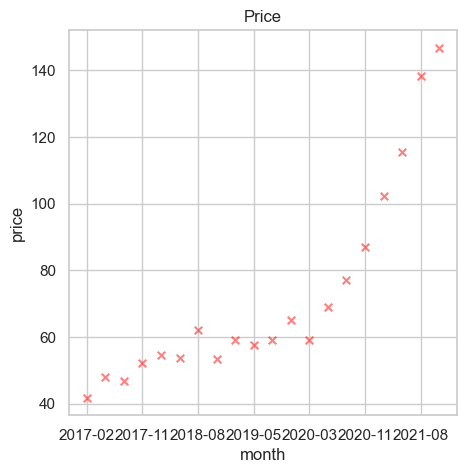

In [153]:
# s: 점의 크기, c:점의 색상, marker : 점의 모양, alplha: 투명도

#격자스타일 추가
sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(5,5))
ax = plt.axes() # 새로운 축 생성
ax.scatter(price_earning["month"], price_earning["close_mean"],
           s=30, c="red", marker="x", alpha=0.5)
ax.set(xlabel='month', ylabel='price', title='Price')
ax.set_xticks(price_earning["month"][np.arange(0, len(price_earning), step=3)])

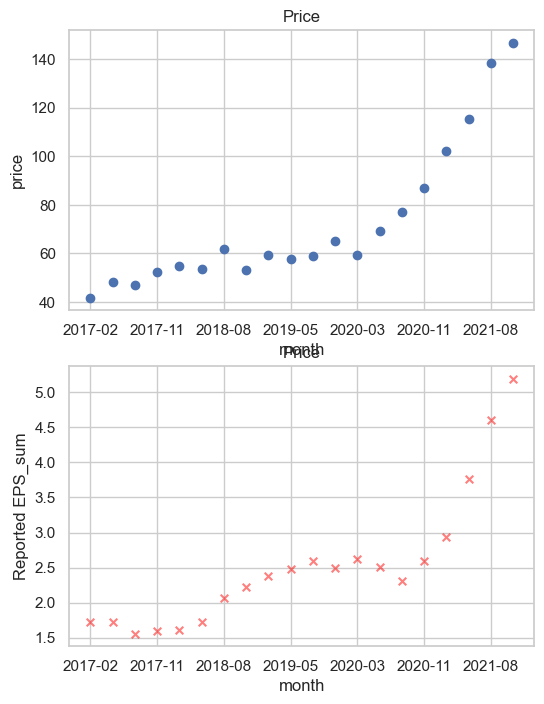

In [154]:
#서브 플롯 : 두 도표를 나란히 놓고 볼수 있음

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
ax1.scatter(price_earning["month"], price_earning["close_mean"])
ax1.set_xticks(price_earning["month"][np.arange(0, len(price_earning), step=3)])
ax1.set(xlabel='month', ylabel='price', title='Price')

ax2.scatter(price_earning["month"], price_earning["Reported EPS_sum"],
        s=30, c="red", marker="x", alpha=0.5)
ax2.set(xlabel='month', ylabel='Reported EPS_sum', title='Price')

ax2.set_xticks(price_earning["month"][np.arange(0, len(price_earning), step=3)])


In [155]:
plt.figure(figsize=(5,5))
ax1.scatter(price_earning["month"], price_earning["close_mean"], label="")
ax1.set_xticks(price_earning["month"][np.arange(0, len(price_earning), step=3)])
ax1.set(xlabel='month', ylabel='price', title='Price')

ax2.scatter(price_earning["month"], price_earning["Reported EPS_sum"],
        s=30, c="red", marker="x", alpha=0.5)
ax2.set(xlabel='month', ylabel='Reported EPS_sum', title='Price')

ax2.set_xticks(price_earning["month"][np.arange(0, len(price_earning), step=3)])

<Figure size 500x500 with 0 Axes>

In [156]:
np.arange(0,len(price_earning), step=3)

array([ 0,  3,  6,  9, 12, 15, 18])

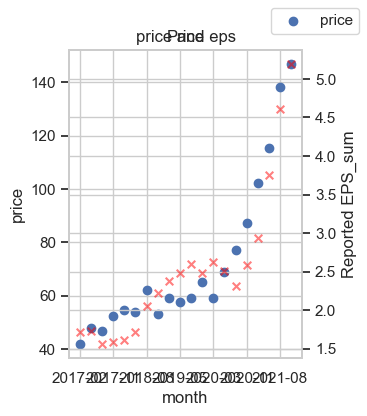

In [157]:
#두 도표 겹치기

fig, ax1= plt.subplots(figsize=(3,4))
ax1.scatter(price_earning["month"], price_earning["close_mean"], label="price")
ax1.set_ylabel('price')
ax1.set_xlabel('month')
ax1.set_title("price and eps")
ax1.set_xticks(price_earning["month"][np.arange(0, len(price_earning), step=3)])

ax2 = ax1.twinx() # 두 도표 겹치기
ax2.scatter(price_earning["month"], price_earning["Reported EPS_sum"],
        s=30, c="red", marker="x", alpha=0.5)
ax2.set_ylabel('eps')
ax2.set(xlabel='month', ylabel='Reported EPS_sum', title='Price')

fig.legend(loc="upper right")
plt.show()


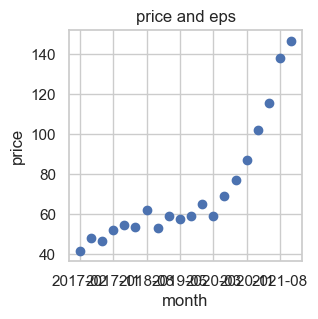

In [158]:
fig, ax1= plt.subplots(figsize=(3,3))
ax1.scatter(price_earning["month"], price_earning["close_mean"], label="price")
ax1.set_ylabel('price')
ax1.set_xlabel('month')
ax1.set_title("price and eps")
ax1.set_xticks(price_earning["month"][np.arange(0, len(price_earning), step=3)])


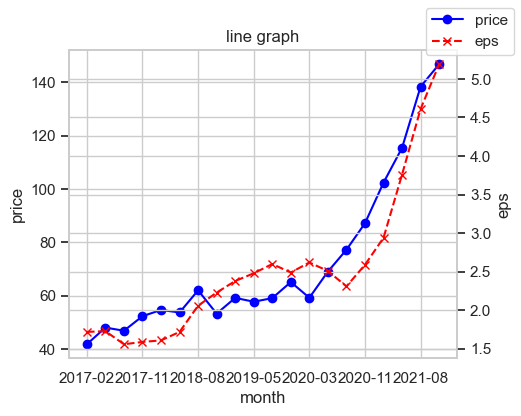

In [159]:
#선그래프 

fig, ax = plt.subplots(figsize=(5,4))

ax.plot(price_earning["month"], price_earning["close_mean"],
        label="price", marker="o", c="blue",linestyle="solid")

ax.set(xlabel="month", ylabel="price", title="line graph")
ax.set_xticks(price_earning["month"][np.arange(0, len(price_earning), step=3)])
ax2 = ax.twinx()

ax2.plot(price_earning["month"], price_earning["Reported EPS_sum"],
        label="eps", marker="x", c="red",linestyle="dashed")
ax2.set_ylabel("eps")
ax2.set_xticks(price_earning["month"][np.arange(0, len(price_earning), step=3)])
fig.legend(loc="upper right")

plt.show()


In [160]:
#저장한 모델 불려오기 
model = pickle.load(open("./data/model.pickle","rb"))

In [161]:
model.params

Intercept           -1.811394
Reported_EPS_sum    29.311641
dtype: float64

In [162]:
b0, b1 = model.params["Reported_EPS_sum"], model.params["Intercept"]

[Text(0.5, 0, 'Reported_EPS_sum'), Text(0, 0.5, 'price')]

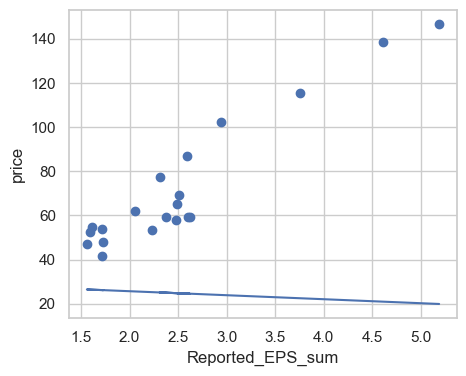

In [163]:
fig, ax = plt.subplots(figsize=(5,4))
x = price_earning["Reported EPS_sum"]
y = price_earning["close_mean"]
ax.scatter(x, y)
ax.plot(x, b1 * x + b0) #선형 회귀 직선 추가 b1 회귀 계수, b0 절편, y 값 계산
ax.set(xlabel="Reported_EPS_sum",ylabel="price")


In [166]:
# 해당하는 컬럼값이 model과 상이하여 변경
price_earning.rename({"Reported EPS_sum" : "Reported_EPS_sum"}, axis=1, inplace=True)

In [ ]:
# 응답 변수 평균에 대한 신뢰구간과 개별 관측값에 대한 예측 구간 추청

# mean : 응답변수 평균의 추정치
# mean_se : 응답변수 평균의 표준오차 
# mean_ci_lower : 신뢰구간 하한
# mean_ci_upper : 신뢰구간 상한
# obs_ci_lower : 예측구간 하한
# obs_ci_upper : 예측구간 상한

#alpha : 0.05이면 95%의 신뢰구간 예측
prediction = model.get_prediction(price_earning).summary_frame(alpha=0.05)
prediction[:10]

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,48.604628,2.966151,42.372976,54.836280,26.540136,70.669120
1,48.897744,2.950805,42.698333,55.097156,26.842336,70.953153
2,43.914765,3.225423,37.138403,50.691128,21.690287,66.139243
3,44.794115,3.174980,38.123728,51.464501,22.601720,66.986509
4,45.380347,3.141794,38.779683,51.981012,23.208809,67.551886
5,48.604628,2.966151,42.372976,54.836280,26.540136,70.669120
6,58.570586,2.517867,53.280744,63.860428,36.753373,80.387798
7,63.553565,2.365675,58.583467,68.523663,41.811665,85.295465
8,67.950311,2.282469,63.155022,72.745600,46.247704,89.652918
9,70.881475,2.256537,66.140668,75.622283,49.190841,92.572109


In [168]:
price_earning.columns

Index(['month', 'Reported_EPS_sum', 'Reported EPS_diff', 'close_mean'], dtype='object')

In [170]:
price_earning["close_mean"].mean(), price_earning["Reported_EPS_sum"].mean() 

(72.49361527512255, 2.5349999999999997)

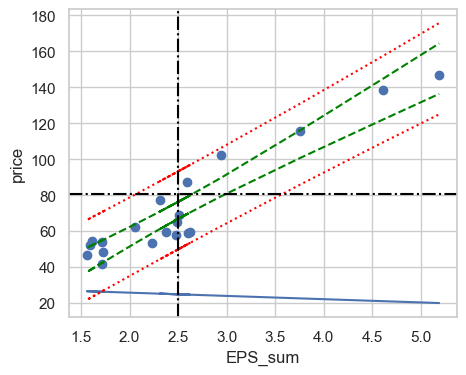

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))
x = price_earning["Reported_EPS_sum"]
y = price_earning["close_mean"]
ax.scatter(x, y)

ax.plot(x, b1*x + b0)
ax.plot(x, prediction["mean_ci_lower"], c="green", linestyle="dashed") #신뢰구간 하한
ax.plot(x, prediction["mean_ci_upper"], c="green", linestyle="dashed") #신뢰구간 상한


ax.plot(x, prediction["obs_ci_lower"], c="red", linestyle="dotted") #예측구간 하한
ax.plot(x, prediction["obs_ci_upper"], c="red", linestyle="dotted") #예측구간 상한

ax.axhline(y=80.5, c="black", linestyle="dashdot") # 가로선
ax.axvline(x=2.5, c="black", linestyle="dashdot") #세로선
ax.set(xlabel="EPS_sum", ylabel="price")

plt.show()

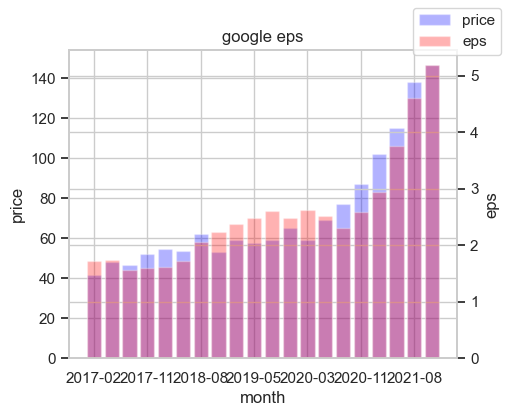

In [184]:
#막대 그래프

fig, ax = plt.subplots(figsize=(5,4))
ax.bar(price_earning["month"], price_earning["close_mean"], 
       label="price", color="blue", alpha=0.3)

ax.set_xlabel("month")
ax.set_ylabel("price")
ax.set_title("google eps")

ax.set_xticks(price_earning["month"][np.arange(0, len(price_earning), step=3)])

ax2 = ax.twinx()

ax2.bar(price_earning["month"], price_earning["Reported_EPS_sum"], 
       label="eps", color="red", alpha=0.3)

ax2.set_ylabel("eps")
ax2.set_xticks(price_earning["month"][np.arange(0, len(price_earning), step=3)])

fig.legend(loc="upper right")
plt.show()

In [186]:
#히스토그램

residuals = model.resid
residuals

0     -3.559379
1      5.055844
2      7.027525
3     18.018888
4     13.063744
5     11.352480
6     -2.692199
7    -15.727945
8     -6.030667
9    -15.284986
10   -13.108907
11    -8.733882
12   -10.245160
13     3.462110
14     5.138008
15     9.308105
16     7.555052
17     2.983278
18    -0.815017
19    -6.766891
dtype: float64

(array([3., 3., 3., 3., 4., 3., 1.]),
 array([-15.72794526, -10.90696904,  -6.08599283,  -1.26501661,
          3.5559596 ,   8.37693582,  13.19791203,  18.01888825]),
 <BarContainer object of 7 artists>)

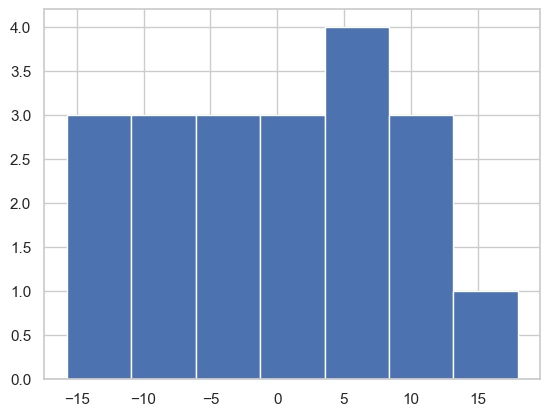

In [187]:
fig, ax = plt.subplots()
ax.hist(residuals, bins=7)


In [ ]:
google = pd.read_csv("./data/google_price.csv", index_col=0, parse_dates=True)
fb = pd.read_csv("./data/meta_price.csv", index_col=0, parse_dates=True)
google = google[(google.index > "2020-01-01") &
                (google.index < "2022-01-01")]

fb = fb[(fb.index > "2020-01-01") & (fb.index < "2022-01-01")]

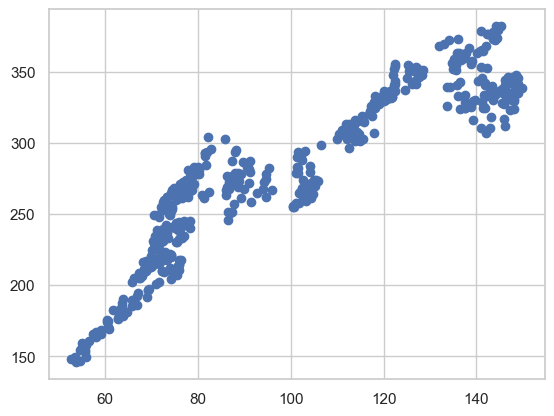

In [205]:
fig, ax = plt.subplots()
ax.scatter(google["close"], fb["close"])

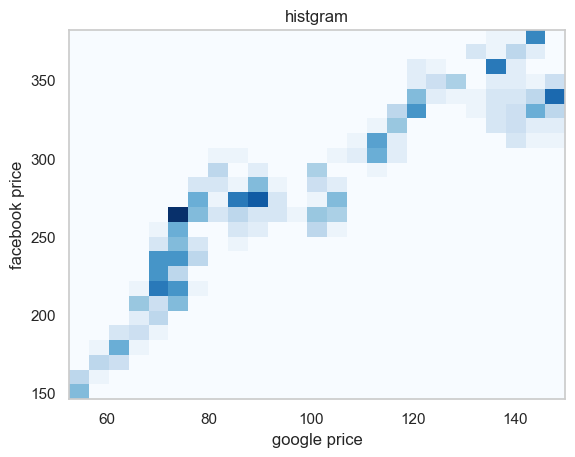

In [ ]:
fig, ax = plt.subplots()
ax.hist2d(google["close"], fb["close"], bins=25, cmap="Blues") # 밀도가 높을수록 진한 색 색상 맵으로 표현
ax.set(xlabel="google price",  ylabel="facebook price", title="histgram")

plt.show()

In [ ]:
# 상자그림 
# index_col=0 : 파일의 특정 열을 인덱스로 사용 첫번째 열을 인덱스로 사용
# parse_dates=True : 특정열을 날짜로 자동 변환
google = pd.read_csv("./data/google_price.csv", index_col=0, parse_dates=True)
google_2017 = google[(google.index > "2017-01-01") &
                     (google.index < "2018-01-01")]["close"]
google_2018 = google[(google.index > "2018-01-01") &
                     (google.index < "2019-01-01")]["close"]
google_2019 = google[(google.index > "2019-01-01") &
                     (google.index < "2020-01-01")]["close"]
google_2020 = google[(google.index > "2020-01-01") &
                     (google.index < "2021-01-01")]["close"]
google_2021 = google[(google.index > "2021-01-01") &
                     (google.index < "2022-01-01")]["close"]



,open,high,low,close,adjclose,volume,ticker
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.504808,893181924,GOOGL
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.703765,456686856,GOOGL
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.730976,365122512,GOOGL
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.617892,304946748,GOOGL
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.646101,183772044,GOOGL
...,...,...,...,...,...,...,...
2024-11-15,173.729996,174.139999,171.220001,172.490005,172.490005,32504600,GOOGL
2024-11-18,173.419998,175.440002,172.899994,175.300003,175.300003,20206600,GOOGL
2024-11-19,173.720001,178.869995,173.559998,178.119995,178.119995,23434900,GOOGL
2024-11-20,177.339996,177.679993,173.779999,175.979996,175.979996,18997100,GOOGL


[Text(1, 0, '2017'),
 Text(2, 0, '2018'),
 Text(3, 0, '2019'),
 Text(4, 0, '2020'),
 Text(5, 0, '2021')]

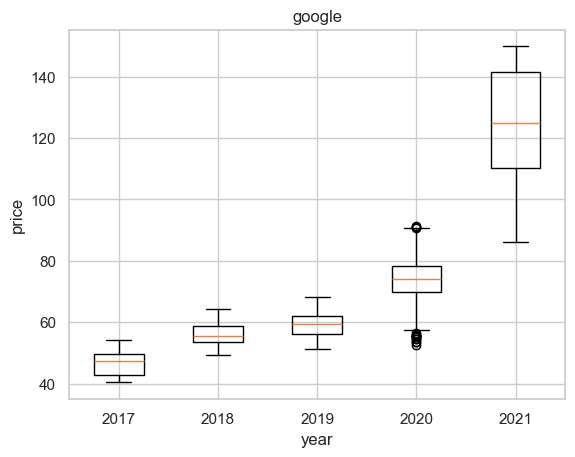

In [219]:
fig, ax = plt.subplots()

ax.boxplot([google_2017, google_2018, google_2019, google_2020, google_2021])

ax.set(xlabel="year", ylabel="price", title="google")
ax.set_xticklabels(["2017","2018","2019","2020","2021"])

In [228]:
price_earning = pd.read_csv("./data/sample_earnings1.csv")
corr = price_earning[["open_mean","Reported EPS_sum",
                      "Reported EPS_diff","close_mean"]].corr()
corr

,open_mean,Reported EPS_sum,Reported EPS_diff,close_mean
open_mean,1.000000,0.946229,0.521762,0.999983
Reported EPS_sum,0.946229,1.000000,0.461195,0.945998
Reported EPS_diff,0.521762,0.461195,1.000000,0.520401
close_mean,0.999983,0.945998,0.520401,1.000000


<Axes: >

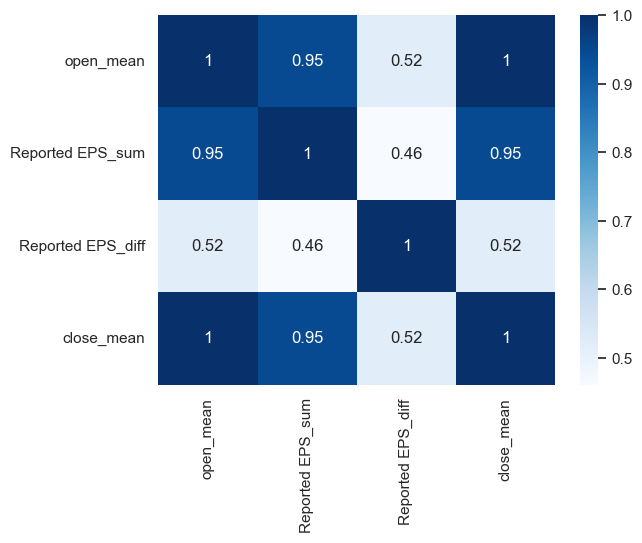

In [ ]:
import seaborn as sns

#상관행렬 계산한 값을 시각화 하기 위해 히트맵에 넣음 
sns.heatmap(corr, cmap="Blues", annot=True)

In [231]:
#줄기잎 그림: stem

eps_ttm = price_earning["Reported EPS_diff"]
stem = eps_ttm.map(lambda x: int(x))

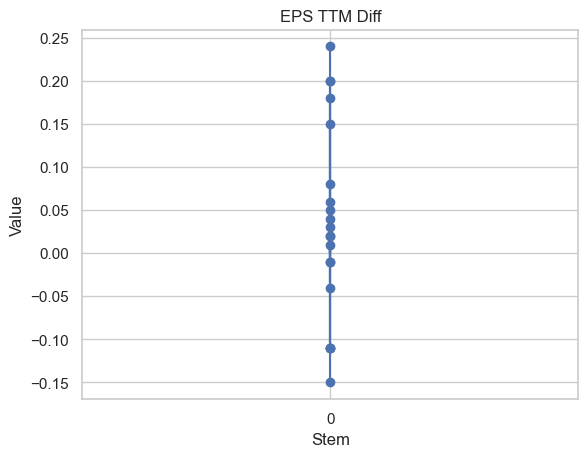

In [234]:
fig, ax = plt.subplots()

ax.stem(stem, eps_ttm)
ax.set(xlabel='Stem', ylabel='Value', title='EPS TTM Diff')
ax.set_xticks(np.arange(int(eps_ttm.min()),
                        int(eps_ttm.max()) + 1))

In [235]:
pip install stemgraphic

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/61.9 kB ? eta -:--:--
   ---------------------------------------- 61.9/61.9 kB 1.6 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13773 sha256=cf0daf6e892aaf2e20fef298695bc18c40f02d4f8b0c12879d4f9dc2585a8b4e
  Stored in directory: c:\users\riskzero\appdata\local\pip\cache\wheels\1a\bf\a1\4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built docopt
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import stemgraphic

#stem 부분을 따로 만들어 줄 필요 없이 scale 값을 1ㄹ로 주면 1의 배수의 부분이 줄기가 되고, 
# 소수 첫째 자리가 잎으로 표현

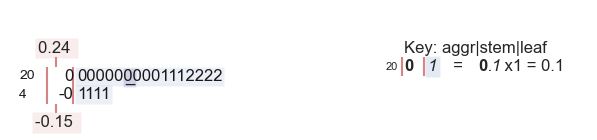

In [237]:
fig, ax = stemgraphic.stem_graphic(price_earning["Reported EPS_diff"], scale=1)

In [238]:
# 오차막대그래프 
price_earning["Reported EPS_diff"].mean()

0.03699999999999999

In [239]:
price_earning["Reported EPS_diff"].min(), price_earning["Reported EPS_diff"].max()

(-0.15, 0.24)

In [ ]:
import random

random.seed(8)
random_eps = [random.uniform(5,200) for i in range(10)] #5개에서 200개 사이의 실수를 반환
random_eps = sorted(random_eps, reverse=False) # reverse= Fasle 오름차순
random_eps

[21.61112726989677,
 29.634525236917614,
 45.832538218337994,
 49.20764257930452,
 53.25099206117159,
 94.53108374061736,
 130.16434483906085,
 142.43929995996353,
 192.64753198770464,
 199.83006513670293]

In [247]:
new_observation = pd.DataFrame({"Reported EPS_diff": random_eps})
new_observation

,Reported EPS_diff
0,21.611127
1,29.634525
2,45.832538
3,49.207643
4,53.250992
5,94.531084
6,130.164345
7,142.439300
8,192.647532
9,199.830065


In [ ]:
new_observation.rename({"Reported EPS_diff" : "Reported_EPS_sum"}, axis=1, inplace=True)

#신뢰구간 유의 수준 95%
#새로운 값에 대한 예측 값을 계산 => 신뢰구간, 관측 구간도 확인 가능
prediction = model.get_prediction(new_observation).summary_frame(alpha=0.05)
prediction


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,631.646207,45.219078,536.644450,726.647964,534.315112,728.977302
1,866.825167,64.197942,731.950294,1001.700039,730.299567,1003.350767
2,1341.615506,102.532117,1126.203521,1557.027491,1125.166132,1558.064880
3,1440.545353,110.520922,1208.349512,1672.741194,1207.386787,1673.703919
4,1559.062561,120.091763,1306.759129,1811.365993,1305.872849,1812.252273
5,2769.049783,217.813322,2311.440973,3226.658593,2310.951725,3227.147841
6,3813.519135,302.172181,3178.678940,4448.359330,3178.326187,4448.712084
7,4173.318211,331.232527,3477.424496,4869.211927,3477.102676,4869.533747
8,5645.003877,450.099008,4699.380951,6590.626803,4699.144096,6590.863659
9,5855.535709,467.103524,4874.187622,6836.883797,4873.959387,6837.112032


In [258]:
prediction["prediction_error"] = prediction["mean"] - prediction["obs_ci_lower"]
prediction["prediction_error"]

0     97.331095
1    136.525600
2    216.449374
3    233.158566
4    253.189712
5    458.098058
6    635.192948
7    696.215535
8    945.859781
9    981.576323
Name: prediction_error, dtype: float64

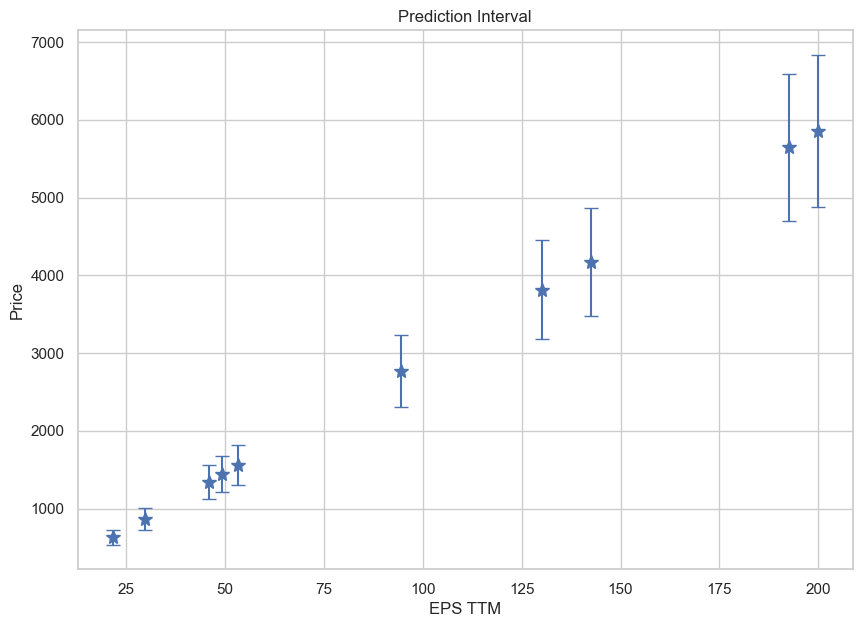

In [ ]:
#오차 막대 : 오차 범위를 표시
# X: X축 좌표 
# Y : Y축 좌표
# YERR : Y축 방향 오차 값(막대의 상하 범위를 지정)
fig, ax = plt.subplots(figsize=(10, 7))
ax.errorbar(x = new_observation["Reported_EPS_sum"],
            y = prediction["mean"],
            yerr = prediction["prediction_error"], # 관측 구간의 하한과 평균값을 빼서 범위 알아 내기
            fmt='*', markersize=10, capsize=5)
ax.set(xlabel='EPS TTM', ylabel='Price',
       title='Prediction Interval')
plt.show()

0     631.646207
1     866.825167
2    1341.615506
3    1440.545353
4    1559.062561
5    2769.049783
6    3813.519135
7    4173.318211
8    5645.003877
9    5855.535709
Name: mean, dtype: float64